# 📊 1️⃣ Exploratory Data Analysis (EDA)
This script: ✅ Loads and cleans the dataset ✅ Analyzes transaction types & fraud distribution 📈 ✅ Examines correlations between transaction amount & fraud 🔍 ✅ Visualizes fraud patterns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
Dataset Overview:
 None 

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64 



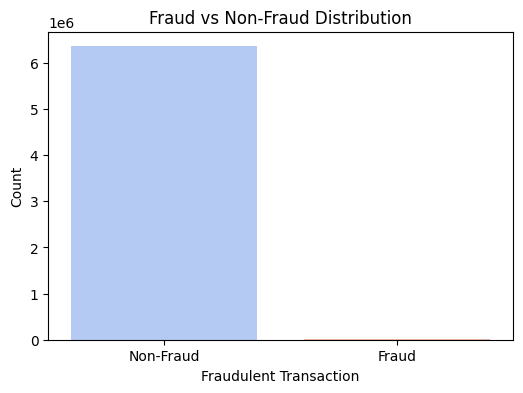

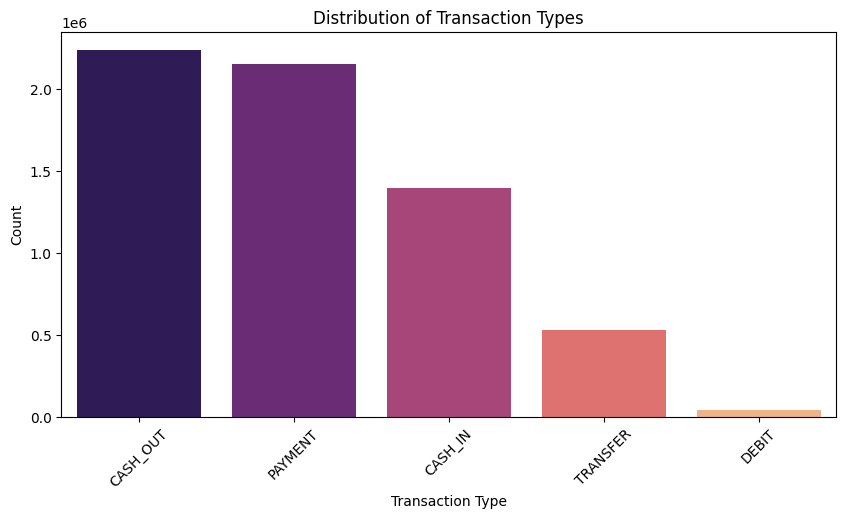

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


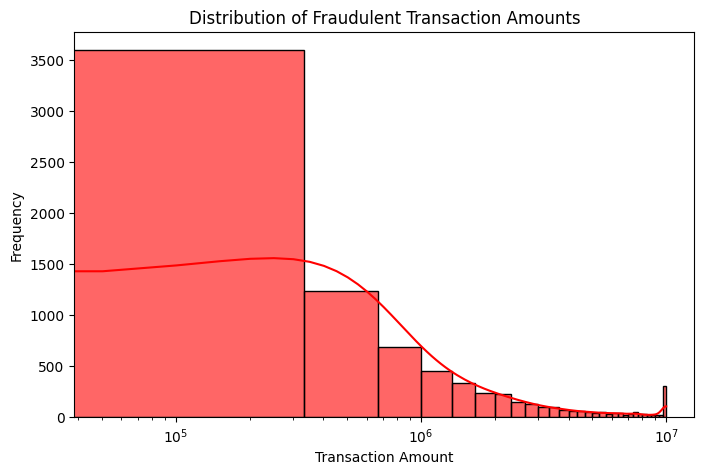

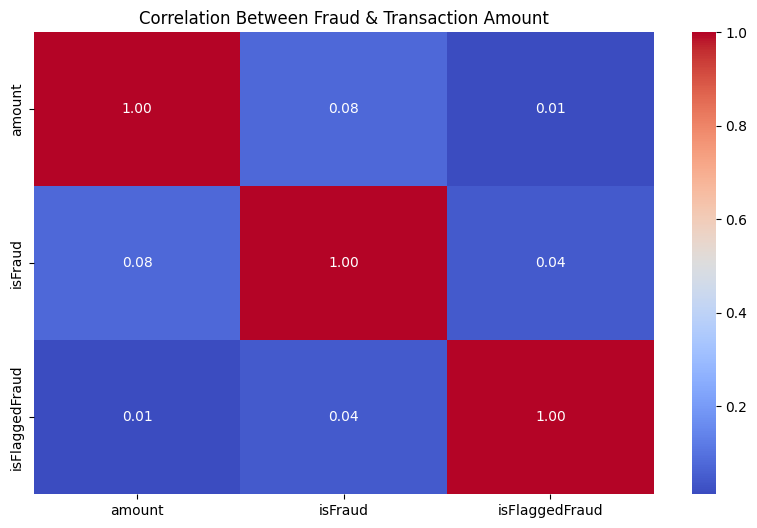

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv"
df = pd.read_csv(data_path)

# Check basic info & missing values
print("Dataset Overview:\n", df.info(), "\n")
print("Missing Values:\n", df.isnull().sum(), "\n")

# Fraud vs Non-Fraud Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="isFraud", data=df, palette="coolwarm")
plt.xlabel("Fraudulent Transaction")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Distribution")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

# Transaction Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="type", data=df, palette="magma", order=df["type"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

# Fraudulent Transaction Amounts
plt.figure(figsize=(8,5))
sns.histplot(df[df["isFraud"] == 1]["amount"], bins=30, kde=True, color="red", alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Fraudulent Transaction Amounts")
plt.xscale("log")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[["amount", "isFraud", "isFlaggedFraud"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Fraud & Transaction Amount")
plt.show()


# 🤖 2️⃣ Machine Learning: Fraud Detection Model
This script: ✅ Loads and processes the dataset ✅ Trains Logistic Regression, Random Forest, and XGBoost models ✅ Evaluates model performance using Precision-Recall AUC

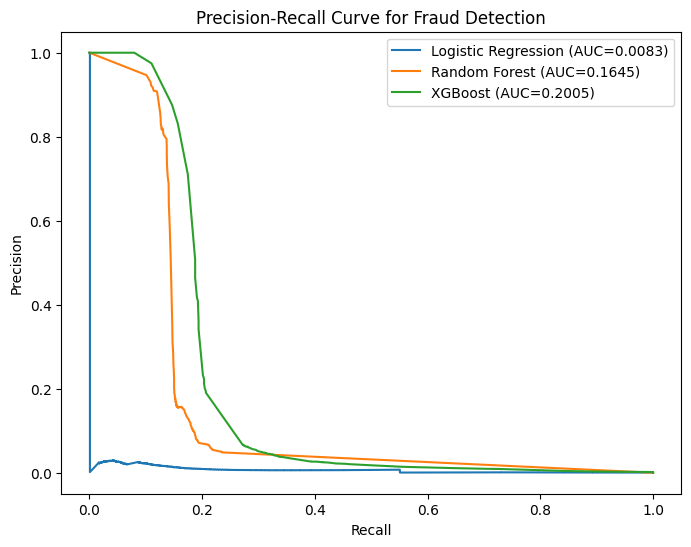

Logistic Regression: Precision-Recall AUC = 0.0083
Random Forest: Precision-Recall AUC = 0.1645
XGBoost: Precision-Recall AUC = 0.2005


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_curve, auc

# Encode categorical variables
df["type"] = LabelEncoder().fit_transform(df["type"])

# Select relevant features (excluding balance columns per dataset instructions)
features = ["type", "amount", "isFlaggedFraud"]
X = df[features]
y = df["isFraud"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

# Evaluate models
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label=1)
    pr_auc = auc(recall, precision)
    results[name] = pr_auc
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Fraud Detection")
plt.legend()
plt.show()

# Print model performance
for model, score in results.items():
    print(f"{model}: Precision-Recall AUC = {score:.4f}")
